<a href="https://colab.research.google.com/github/Samuel-Solomon-1/Assignment-6-House-Price-Prediction-Using-California-Housing-Data/blob/main/Lesson_6_ml_basic_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




### Imports
In this section, we import all the necessary libraries:
- **pandas** and **numpy** for data handling and analysis,
- **matplotlib** and **seaborn** for data visualization,
- **sklearn.datasets** for loading the California Housing dataset,
- **sklearn.model_selection** for splitting the data into training and testing sets,
- **sklearn.linear_model** for building a regression model,
- **sklearn.metrics** for evaluating the model.

### Data Collection and Loading
We load the **California Housing** dataset using `fetch_california_housing()` and convert it into a `pandas` DataFrame. The target variable (`MedHouseVal`) is added to the dataset as a new column.

In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---
# Load dataset and convert to DataFrame:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

### Quick Check of Data
Here we inspect the dataset by:
- Viewing the first few rows to understand the data structure.
- Checking the data types and summary statistics using `.info()` and `.describe()`.
- This helps identify which features are numerical and ensures the data is in good shape.

In [2]:
# --- Quick Check of Data ---
# Display the first few rows of the dataset to understand its structure.
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
# Check the features and target variable
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

### EDA and Data Preprocessing
In this section:
- We check for missing or null values using `.isnull().sum()`.
- Then, we explore the relationship between input features and the target variable using scatter plots.
- A custom function is defined to automate plotting features like `MedInc`, `AveRooms`, `AveOccup`, and `HouseAge` against `MedHouseVal`.

In [4]:
# --- EDA and Data Preprocessing ---
# Check for missing/null values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


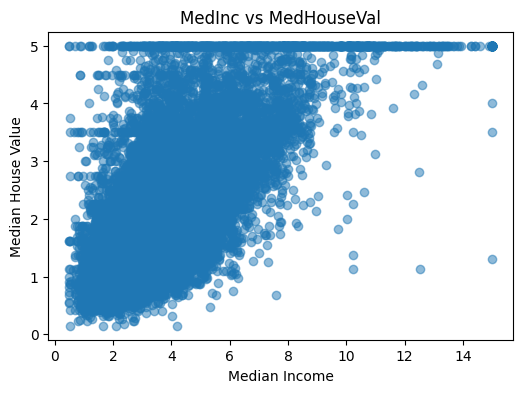

In [5]:
# Visualize the data: scatter plot between 'MedInc' and 'MedHouseVal'
plt.figure(figsize=(6, 4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('MedInc vs MedHouseVal')
plt.show()

In [6]:
# Function to automate scatter plots for all features vs MedHouseVal
def plot_feature_vs_target(features, target='MedHouseVal', df=df):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(df[feature], df[target], alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f'{feature} vs {target}')
        plt.show()

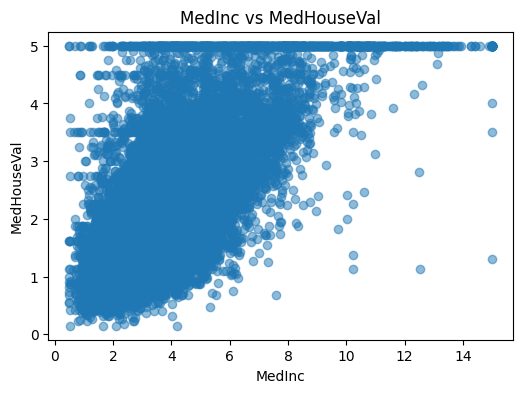

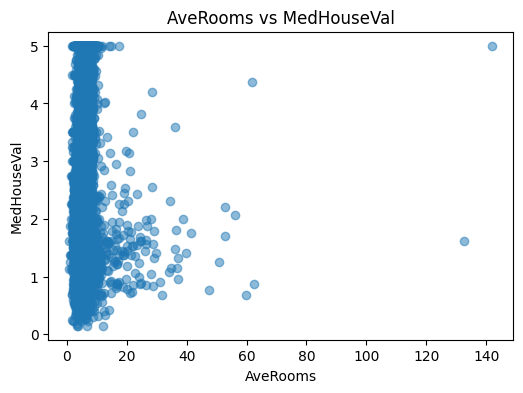

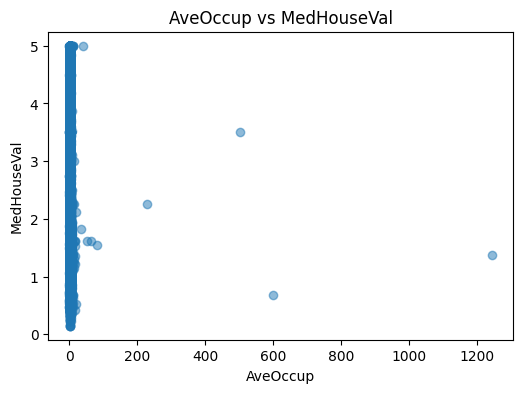

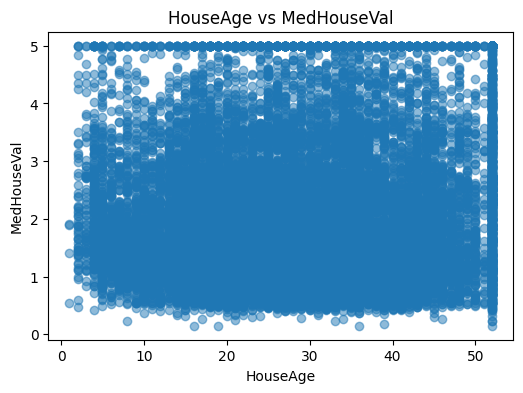

In [7]:
# Use the function to visualize the relationships
plot_feature_vs_target(['MedInc', 'AveRooms', 'AveOccup', 'HouseAge'])

### ML Model Training
We:
- Define our features (X) and target (y).
- Split the dataset into training and testing sets using an 80/20 split.
- Choose a `LinearRegression` model and train it using the training data.

In [8]:
# --- ML Model Training ---
# Define X (features) and y (target)
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Define regression model
model = LinearRegression()

In [10]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation
The model is evaluated on the test data using the following metrics:

- **Root Mean Squared Error (RMSE):** `0.7456`  
  This indicates that, on average, the model's predicted house values deviate from the actual values by approximately $74,560 (since the target variable is in units of $100,000). While this is a moderate level of error, it suggests the model could benefit from further refinement or using more complex models.

- **R-squared (R²):** `0.5758`  
  This value means that the linear model explains about **57.6% of the variance** in the house prices. In other words, over half of the variability in the housing prices can be explained by the features used. While this is a reasonable starting point, it also shows that there’s significant room for improvement—potentially by using non-linear models, adding feature interactions, or further preprocessing.

**Conclusion:**  
The current linear regression model provides a baseline performance. It captures a meaningful portion of the variance in the housing data, but the RMSE and R² suggest that a more sophisticated model (e.g., Random Forest, Gradient Boosting) might yield better predictions.

In [11]:
# --- Model Evaluation ---
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758


### Model Prediction
Finally, we use the trained model to predict the median house value for a new input sample. The prediction is scaled to dollars by multiplying by 100,000 (as the dataset uses units of $100,000).

In [12]:
# --- Model Prediction ---
# New data input
new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])  # Reshape (1, 8)
prediction = model.predict(new_data)
print(f"Predicted Median House Value: ${prediction[0]*100000:.2f}")

Predicted Median House Value: $154866.33


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
